# TODO
- (argmax, max) per speedup e scalabilita
- qualcosa vs dimensione collezione (n) per vedere la gustafson legge

In [158]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [159]:
results_df = pd.read_csv("../Statistics/service_time_trial.csv")
results_df.head()

,max_nw,active_workers_history,service_time_history,service_time_goal,emitter_elapsed_time_history,workers_elapsed_time_history,collector_elapsed_time_history
0,8,1,593,1000,580,1187,1295
1,8,1,1198,1000,7,1199,0
2,8,1,1124,1000,1219,1121,1157
3,8,1,1123,1000,11,1123,0
4,8,1,1111,1000,1157,1111,1303


### Service Time History

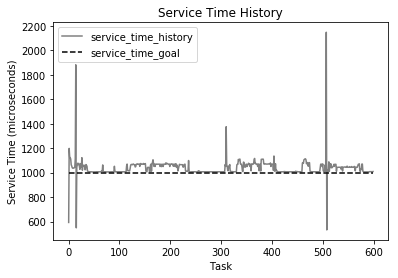

In [160]:
# plot servive_time_history vs service_time_goal
results_df.plot(y=['service_time_history', 'service_time_goal'],
                style=['-', '--'],
                color=['gray', 'black'])

plt.ylabel('Service Time (microseconds)')
plt.xlabel('Task')
plt.title('Service Time History')
plt.show()

### Service Time Error

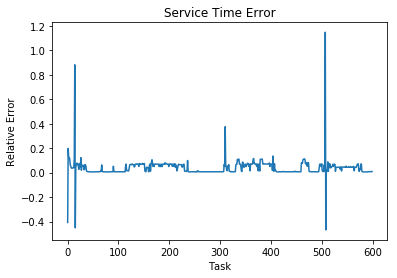

In [161]:
# plot relative error between  service_time_goal and service_time_history
y1 = np.array(results_df['service_time_history'])
y2 = np.array(results_df['service_time_goal'])

relative_error = (y1-y2)/y2

plt.plot(relative_error)
plt.ylabel('Relative Error')
plt.xlabel('Task')
plt.title('Service Time Error')
plt.show()

### Throughput

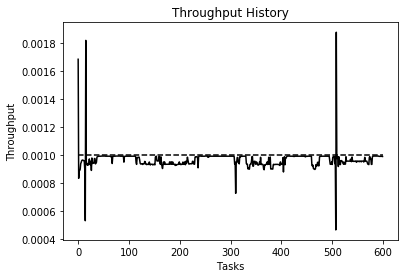

In [162]:
throughput_history = 1/y1
throughtput_goal = 1/y2

plt.plot(throughput_history,'-', color='black', label='throughput history')
plt.plot(throughtput_goal, '--', color='black', label='throughput goal')
plt.xlabel('Tasks')
plt.ylabel('Throughput')
plt.title('Throughput History')
plt.show()

### Parallelism Degree

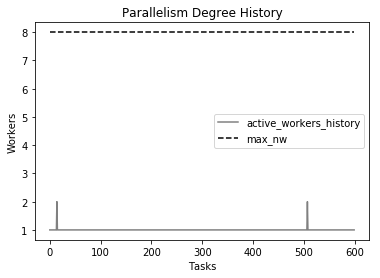

In [163]:
# plot parallelism degree vs max nw
results_df.plot(y=['active_workers_history', 'max_nw'],
                style=['-', '--'],
                color=['gray', 'black'])
plt.ylabel('Workers')
plt.xlabel('Tasks')
plt.title('Parallelism Degree History')
plt.show()

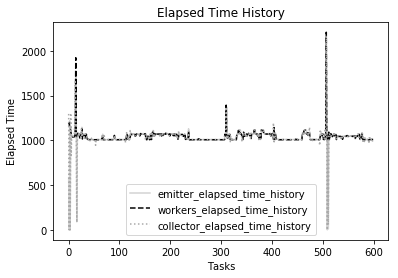

In [164]:
# plot emitter, workers and collector elapsed time history
results_df.plot(y=['emitter_elapsed_time_history','workers_elapsed_time_history','collector_elapsed_time_history'],
                style=['-', '--', ':'],
                color=['lightgray', 'black', 'darkgray'])
plt.ylabel('Elapsed Time')
plt.xlabel('Tasks')
plt.title('Elapsed Time History')
plt.show()

### Completion Time

In [165]:
tc_vs_nw_df = pd.read_csv('../Statistics/completion_time_vs_nw.csv')
tc_vs_nw_df.head()

,nw,completion_time
0,1,626750
1,2,310072
2,3,211698
3,4,164796
4,5,160883


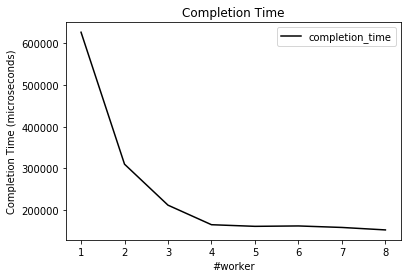

In [166]:
tc_vs_nw_df.plot(x='nw', y='completion_time', style='-', color='black')
plt.xlabel('#worker')
plt.ylabel('Completion Time (microseconds)')
plt.title('Completion Time')
plt.show()

In [167]:
print("min completion time:", np.min(tc_vs_nw_df['completion_time']), 
      "obtained with", np.argmin(tc_vs_nw_df['completion_time'])+1, "workers")

min completion time: 152303 obtained with 8 workers


/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


### Scalability

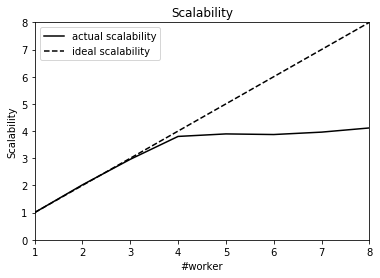

In [168]:
# scalability
tc = tc_vs_nw_df['completion_time']
nw = tc_vs_nw_df['nw']

scalability = [tc[0]/float(t) for t in tc]

plt.plot(nw, scalability, linestyle='-', label='actual scalability', color='black')
plt.plot(nw, nw, linestyle='--', label='ideal scalability', color='black')
plt.legend(loc='best')
plt.xlabel('#worker')
plt.ylabel('Scalability')
plt.ylim([0, np.max(nw)])
plt.xlim([1, np.max(nw)])
plt.title('Scalability')
plt.show()

In [169]:
n_worker, max_scalability = np.argmax(scalability), np.max(scalability)
print("max scalability:", round(max_scalability,4), "obtained with", n_worker+1, "workers")

max scalability: 4.1152 obtained with 8 workers


### Speedup

In [170]:
# speedup
sequential_time = pd.read_csv('../Statistics/sequential_time.csv')
sequential_time

,sequential_time
0,600065


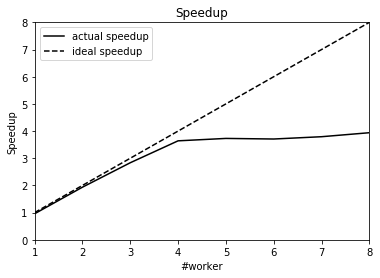

In [171]:
tseq = sequential_time['sequential_time']
speedup = [tseq/float(t) for t in tc]

plt.plot(nw, speedup, linestyle='-', label='actual speedup', color='black')
plt.plot(nw, nw, linestyle='--', label='ideal speedup', color='black')
plt.legend(loc='best')
plt.xlabel('#worker')
plt.ylabel('Speedup')
plt.ylim([0, np.max(nw)])
plt.xlim([1, np.max(nw)])
plt.title('Speedup')
plt.show()

In [172]:
n_worker, max_speedup = np.argmax(speedup), np.max(speedup)
print("max speedup:", round(max_speedup,4), "obtained with", n_worker+1, "workers")

max speedup: 3.9399 obtained with 8 workers


### Efficiency

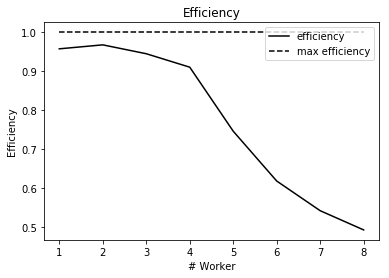

In [173]:
efficiency = [ sp/float(n) for n, sp in zip(nw, speedup)]
plt.hlines(1, 1, max(nw), linestyle='--', label='max efficiency')
plt.plot(nw, efficiency, color='black', label='efficiency')
plt.xlabel('# Worker')
plt.ylabel('Efficiency')
plt.title('Efficiency')
plt.legend(loc='best')
plt.show()

In [174]:
print("max efficiency:", np.max(efficiency), "with nw=", np.argmax(efficiency)+1)
print("min efficiency:", np.min(efficiency), "with nw=", np.argmin(efficiency)+1)

max efficiency: 0.9676220361722438 with nw= 2
min efficiency: 0.492492761140621 with nw= 8


### Alpha
- colonna 1: alpha
- colonna 2: ts_goal
- colonna 3-fine: service_time_history

In [175]:
ts_vs_alpha_df = pd.read_csv("../Statistics/service_time_history_vs_alpha.csv", header=None)
ts_vs_alpha_df.head()

,0,1,2,3,4,5,6,7,8,9,...,592,593,594,595,596,597,598,599,600,601
0,0.00,1000,507,1014,1014,1014,1014,1014,1014,1014,...,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014
1,0.05,1000,505,1010,1009,1008,1007,1006,1006,1006,...,1006,1006,1009,1012,1014,1016,1018,1020,1024,1025
2,0.10,1000,506,1012,1012,1012,1011,1010,1009,1016,...,1052,1051,1050,1049,1048,1047,1047,1047,1046,1046
3,0.15,1000,505,1009,1009,1009,1008,1013,1017,1021,...,1006,1006,1006,1006,1006,1006,1006,1006,1015,1021
4,0.20,1000,507,1013,1011,1011,1055,1046,1045,1038,...,1050,1053,1055,1057,1059,1061,1062,1064,1053,1052


- prova per n differenti

[]

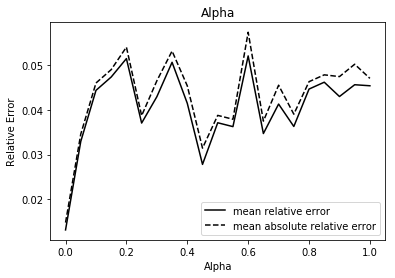

In [176]:
#ts_vs_alpha_df.loc[0, 1:]
alpha_values = ts_vs_alpha_df.loc[:,0]
ts_goal = ts_vs_alpha_df.loc[0,1]

ts_histories = np.array(ts_vs_alpha_df.loc[:, 2:])
n_alpha, n_tasks = ts_histories.shape

ts_goal = np.full((n_tasks),ts_goal)

rel_errors = np.array([(ts - ts_goal)/ts_goal for ts in ts_histories])

mean_rel_error = np.mean(rel_errors, 1)
mean_abs_rel_error = np.mean(np.abs(rel_errors), 1)

plt.plot(alpha_values, mean_rel_error, label='mean relative error', linestyle='-', color='black')
plt.plot(alpha_values, mean_abs_rel_error, label='mean absolute relative error', linestyle='--', color='black')
plt.legend(loc='best')
plt.xlabel('Alpha')
plt.ylabel('Relative Error')
plt.title('Alpha')
plt.plot()

In [177]:
print("min rel error:", round(np.min(mean_rel_error),4), "obtained with alpha:", alpha_values[np.argmin(mean_rel_error)])
print("min abs rel error:", round(np.min(mean_abs_rel_error),4), "obtained with alpha:", alpha_values[np.argmin(mean_abs_rel_error)])

min rel error: 0.0132 obtained with alpha: 0.0
min abs rel error: 0.0148 obtained with alpha: 0.0


### Max speedup / scalability vs task size

In [178]:
# load task_size vs sequential_time 
task_size_vs_tseq_df = pd.read_csv('../Statistics/task_size_vs_sequential_time.csv')
task_size_vs_tseq_df.head()

task_sizes = task_size_vs_tseq_df['task_size']
sequential_times = task_size_vs_tseq_df['sequential_time']
task_size_vs_tseq_df.head()

,task_size,sequential_time
0,250,150070
1,500,300108
2,1000,600078
3,2000,1200112
4,4000,2400171


In [179]:
# load completion_time vs nw for each task size
tc_vs_nw_df_list = []
for task_size in task_sizes:
    df = pd.read_csv('../Statistics/TaskSize/completion_time_vs_nw_task_size_' + 
                     str(task_size) + '.csv')
    tc_vs_nw_df_list.append(df)

tc_vs_nw_df_list[0].head()

,nw,completion_time
0,1,169610
1,2,85942
2,3,59117
3,4,51527
4,5,43697


In [180]:
max_speedups = []
max_scalabilities = []

for i in range(len(tc_vs_nw_df_list)):
    tseq = sequential_times[i]
    tc_list = df['completion_time']
    speedup = [tseq/float(tc) for tc in tc_list]
    scalability = [tc_list[0]/float(tc) for tc in tc_list]
    
    max_speedups.append(np.max(speedup))
    max_scalabilities.append(np.max(scalability))

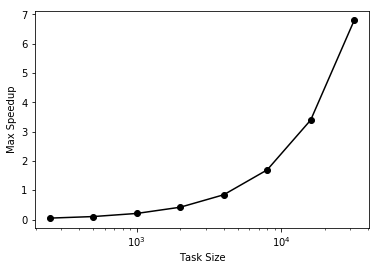

In [181]:
plt.plot(task_sizes, max_speedups, 'o-', color='black', label='max speedup')
#plt.plot(task_sizes, max_scalabilities, 'x-', color='grey', label='max scalability')
plt.xscale('log')
plt.ylabel('Max Speedup')
plt.xlabel('Task Size')
plt.show()

### Max Speedup / Scalability vs Collection Size

In [182]:
# load coll_size vs sequential_time 
coll_size_vs_tseq_df = pd.read_csv('../Statistics/collection_size_vs_sequential_time.csv')
coll_size_vs_tseq_df.head()

coll_sizes = coll_size_vs_tseq_df['collection_size']
sequential_times = coll_size_vs_tseq_df['sequential_time']
coll_size_vs_tseq_df.head()

,collection_size,sequential_time
0,300,300037
1,600,600075
2,1200,1200161
3,2400,2400263
4,4800,4800525


In [183]:
# load completion_time vs nw for each coll size
tc_vs_nw_df_list = []
for coll_size in coll_sizes:
    df = pd.read_csv('../Statistics/CollSize/completion_time_vs_nw_coll_size_' + 
                     str(coll_size) + '.csv')
    tc_vs_nw_df_list.append(df)

tc_vs_nw_df_list[0].head()

,nw,completion_time
0,1,314362
1,2,160411
2,3,104139
3,4,79062
4,5,81135


In [184]:
max_speedups = []
max_scalabilities = []

for i in range(len(tc_vs_nw_df_list)):
    tseq = sequential_times[i]
    tc_list = df['completion_time']
    speedup = [tseq/float(tc) for tc in tc_list]
    scalability = [tc_list[0]/float(tc) for tc in tc_list]
    
    max_speedups.append(np.max(speedup))
    max_scalabilities.append(np.max(scalability))

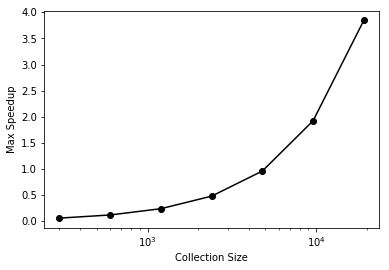

In [185]:
plt.plot(coll_sizes, max_speedups, 'o-', color='black', label='max speedup')
#plt.plot(coll_sizes, max_scalabilities, 'x-', color='grey', label='max scalability')
plt.xscale('log')
plt.ylabel('Max Speedup')
plt.xlabel('Collection Size')
plt.show()